In [1]:
import pandas as pd
import time
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

devices_info = pd.read_csv('C:\\Users\\ruben\\Desktop\\Investigation\\updated_dataset_23_3_2018\\devices.csv', index_col='id', skipinitialspace=True, parse_dates=['created_at', 'updated_at'])

devices_info['model'] = devices_info['model'].str.lower()
devices_info['manufacturer'] = devices_info['manufacturer'].str.lower()
devices_info['brand'] = devices_info['brand'].str.lower()
devices_info['product'] = devices_info['product'].str.lower()

devices_info.head()


,uuid,model,manufacturer,brand,product,os_version,kernel_version,is_root,created_at,updated_at
id,,,,,,,,,,
1,7539d2fd-90bf-4a9e-85ee-1ecb2fbb9788,vs500pp,lge,lge,m1v_pp_vzw,6.0.1,3.10.49-gf18313b-00011-g5e5ed63,0,2017-10-09 03:42:19,2017-10-09 03:42:19
2,59fc6c14-a28b-4d49-bace-07263c5be6a7,ao5510,yu,yu,yureka,5.1.1,3.10.49-cyanogenmod-gbca6118,1,2017-10-09 04:39:53,2017-10-09 04:39:53
3,19f620d2-3bd7-46f6-ac41-4710526147c3,asus_x014d,asus,asus,ww_phone,5.1.1,3.4.0-gdf95949-dirty,0,2017-10-09 04:48:35,2017-10-09 04:48:35
4,242126bc-0b29-4ac2-a96f-4f93f86ba800,nexus 5,lge,google,hammerhead,6.0.1,3.4.0-gcf10b7e,0,2017-10-09 06:50:04,2017-10-09 06:50:04
5,13192eb0-50e3-4f20-bc51-7914991f8b65,lg-d331,lge,lge,luv80ss_global_com,4.4.2,3.4.67,0,2017-10-09 09:01:16,2017-10-09 09:01:16


In [2]:
print('Number of devices =', len(devices_info))

Number of devices = 3117


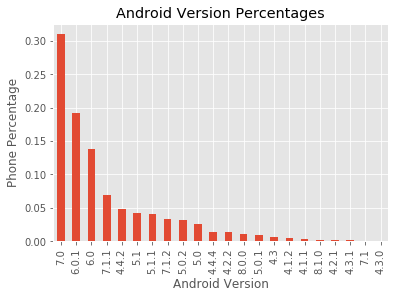

In [3]:
all_versions_percentage = devices_info.os_version.value_counts(normalize=True) #get all version percentage

plt.title('Android Version Percentages')
plt.xlabel('Android Version')
plt.ylabel('Phone Percentage')
all_versions_percentage.plot.bar()

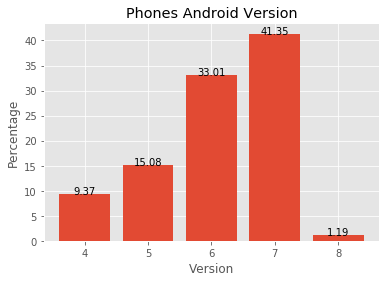

In [4]:
def getVersionCounter(all_versions_counts):
    version_counts = dict()
    
    for index_val, series_val in all_versions_counts.iteritems():
        if index_val[0] in version_counts:
            version_counts[index_val[0]] += series_val
        else:
            version_counts[index_val[0]] = series_val
    
    return version_counts

version_percentage = getVersionCounter(all_versions_percentage) #join all versions

keys, values = zip(*version_percentage.items()) #gets 2 lists one with keys another with values od dictionary
values = [x * 100 for x in values] #convert to percentage (int)
plt.bar(keys, values, align='center')
plt.title('Phones Android Version')
plt.xlabel('Version')
plt.ylabel('Percentage')
for a, b in zip(keys, values):
    plt.text(a, b, str(round(b, 2)), ha='center')
plt.show()

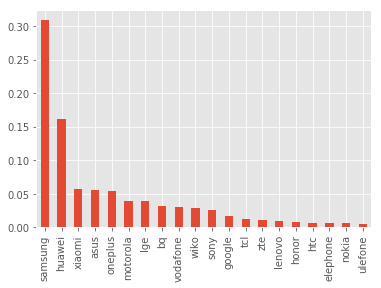

In [5]:
devices_info.brand.value_counts(normalize=True)[:20].plot.bar()

In [6]:
print('Number of Devices create before in 2017:', len(devices_info[devices_info['created_at'] < '2018-01-01']))
print('Number of Devices create before in 2018:', len(devices_info[devices_info['created_at'] >= '2018-01-01']))
print('Average devices installed per month in 2017:', round(len(devices_info[devices_info['created_at'] < '2018-01-01'])/12, 1))
print('Average devices installed per month in 2018:', round(len(devices_info[devices_info['created_at'] >= '2018-01-01'])/12, 1))

Number of Devices create before in 2017: 2930
Number of Devices create before in 2018: 187
Average devices installed per month in 2017: 244.2
Average devices installed per month in 2018: 15.6


In [7]:
print('Date of first device =', devices_info.iloc[0].created_at)
print('Date of last device =', devices_info.iloc[len(devices_info)-1].created_at)

Date of first device = 2017-10-09 03:42:19
Date of last device = 2018-02-13 23:17:04
